In [2]:
import pandas as pd 

In [3]:
df =  pd.read_csv("Churn_Modelling.csv")

In [4]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
df.shape

(10000, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [7]:
df.duplicated().sum()

0

In [8]:
df["Exited"].value_counts()

0    7963
1    2037
Name: Exited, dtype: int64

In [9]:
df["Geography"].value_counts()

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64

In [10]:
df["Gender"].value_counts()

Male      5457
Female    4543
Name: Gender, dtype: int64

In [12]:
df.drop(columns=["RowNumber","CustomerId","Surname"],inplace=True)

In [13]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [15]:
df = pd.get_dummies(df,columns=["Geography","Gender"],drop_first=True)

In [16]:
df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0


In [19]:
X = df.drop(columns=["Exited"])
y =  df["Exited"]

In [17]:
from sklearn.model_selection import train_test_split

In [24]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=1)

In [25]:
X_train.shape

(8000, 11)

In [26]:
X_test.shape

(2000, 11)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

X_train_scaled =  scaler.fit_transform(X_train)
X_test_scaled  = scaler.fit_transform(X_test)

In [33]:
X_train_scaled

array([[-0.23082038, -0.94449979, -0.70174202, ...,  1.71490137,
        -0.57273139,  0.91509065],
       [-0.25150912, -0.94449979, -0.35520275, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [-0.3963303 ,  0.77498705,  0.33787579, ...,  1.71490137,
        -0.57273139, -1.09278791],
       ...,
       [ 0.22433188,  0.58393295,  1.3774936 , ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 0.13123255,  0.01077067,  1.03095433, ..., -0.58312392,
        -0.57273139, -1.09278791],
       [ 1.1656695 ,  0.29735181,  0.33787579, ...,  1.71490137,
        -0.57273139,  0.91509065]])

In [35]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

In [80]:
model = Sequential()

model.add(Dense(11,activation="relu",input_dim=11))
model.add(Dense(11,activation="relu"))
model.add(Dense(1,activation="sigmoid"))

In [81]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_12 (Dense)            (None, 11)                132       
                                                                 
 dense_13 (Dense)            (None, 11)                132       
                                                                 
 dense_14 (Dense)            (None, 1)                 12        
                                                                 
Total params: 276
Trainable params: 276
Non-trainable params: 0
_________________________________________________________________


In [82]:
model.compile(loss="binary_crossentropy",optimizer="Adam",metrics=["accuracy"])

In [83]:
history = model.fit(X_train_scaled,y_train,epochs=100,validation_split=0.2)

Epoch 1/100
200/200 [==============================] - 1s 3ms/step - loss: 0.5538 - accuracy: 0.7445 - val_loss: 0.4914 - val_accuracy: 0.7975
Epoch 2/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4579 - accuracy: 0.7998 - val_loss: 0.4514 - val_accuracy: 0.8050
Epoch 3/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4347 - accuracy: 0.8072 - val_loss: 0.4366 - val_accuracy: 0.8069
Epoch 4/100
200/200 [==============================] - 1s 4ms/step - loss: 0.4230 - accuracy: 0.8122 - val_loss: 0.4264 - val_accuracy: 0.8125
Epoch 5/100
200/200 [==============================] - 1s 5ms/step - loss: 0.4135 - accuracy: 0.8164 - val_loss: 0.4175 - val_accuracy: 0.8150
Epoch 6/100
200/200 [==============================] - 1s 3ms/step - loss: 0.4042 - accuracy: 0.8206 - val_loss: 0.4070 - val_accuracy: 0.8250
Epoch 7/100
200/200 [==============================] - 1s 3ms/step - loss: 0.3945 - accuracy: 0.8248 - val_loss: 0.3982 - val_accuracy: 0.8288

Epoch 58/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3272 - accuracy: 0.8639 - val_loss: 0.3425 - val_accuracy: 0.8537
Epoch 59/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3261 - accuracy: 0.8642 - val_loss: 0.3434 - val_accuracy: 0.8556
Epoch 60/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8681 - val_loss: 0.3441 - val_accuracy: 0.8556
Epoch 61/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3259 - accuracy: 0.8653 - val_loss: 0.3430 - val_accuracy: 0.8550
Epoch 62/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8653 - val_loss: 0.3424 - val_accuracy: 0.8531
Epoch 63/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3260 - accuracy: 0.8658 - val_loss: 0.3424 - val_accuracy: 0.8537
Epoch 64/100
200/200 [==============================] - 0s 2ms/step - loss: 0.3253 - accuracy: 0.8655 - val_loss: 0.3435 - val_accuracy:

In [84]:
model.layers[0].get_weights()

[array([[-0.19490449, -0.03301855,  0.16031368,  0.18512899,  0.22785299,
          0.05020599, -0.33895797, -0.11695457,  0.04344187,  0.01128273,
          0.05667631],
        [ 0.45747066,  0.3090003 , -0.06576229, -0.7439642 , -0.13239336,
         -0.8387815 ,  0.20002812,  0.8938206 ,  0.3553937 ,  0.7753221 ,
         -0.45203632],
        [ 0.35219678,  0.16765161, -0.11578135, -0.05985006,  0.06282002,
         -0.01833139,  0.2215102 ,  0.04822126,  0.17282607,  0.11546149,
         -0.11989766],
        [-0.5279613 , -0.23864491,  0.2779788 , -0.50783366, -0.99338335,
          0.18764466,  0.04429715,  0.21668942,  0.00552349,  0.03999021,
         -0.39770228],
        [ 0.16253021,  0.29739574,  0.07685532,  0.04879012, -0.3886505 ,
          0.00396328,  1.0854886 , -0.95532554,  1.4882529 ,  0.17665723,
          0.19120385],
        [-0.04990744,  0.08907145,  0.373555  , -0.03494164,  0.03629899,
         -0.03389514,  0.350153  , -0.09741156, -0.0860469 ,  0.1204945

In [85]:
model.layers[1].get_weights()

[array([[ 0.24392503,  0.45621684,  0.2747524 ,  0.22900796,  0.2174125 ,
          0.3603474 , -0.55982447,  0.01328453,  0.4604547 ,  0.37263325,
         -0.2959779 ],
        [-0.21953629,  0.4428431 ,  0.33765304, -0.16776481, -0.16466303,
         -0.3235265 , -0.47740576,  0.0341034 ,  0.71870047,  0.5737826 ,
         -0.12243868],
        [ 0.5221357 ,  0.35515606,  0.30094916,  0.2829655 ,  0.2740206 ,
          0.2304779 ,  0.5283581 ,  0.4549485 ,  0.22650902, -0.19389236,
         -0.17517096],
        [ 0.30842674,  0.38197786, -0.11094042,  0.52362776,  0.13259718,
         -0.1200568 , -0.11010048,  0.08896928, -0.574284  ,  0.5014206 ,
          0.19120295],
        [-0.40750137, -0.22031285,  0.11828932, -0.54287577, -0.5973356 ,
         -0.2275509 , -0.8090187 , -0.47295207,  0.61718583,  0.23718037,
         -0.6239465 ],
        [ 0.20510547,  0.40976626,  0.19645528,  0.48813716,  0.24344128,
         -0.5897943 , -0.4091968 ,  0.30612138, -1.2390232 , -0.0056457

In [87]:
model.layers[2].get_weights()

[array([[-0.5828942 ],
        [-0.13323279],
        [-0.27456832],
        [ 1.2848079 ],
        [-0.4964809 ],
        [ 0.8562912 ],
        [ 1.457876  ],
        [-0.7780254 ],
        [ 0.82775176],
        [-0.60285896],
        [ 0.85334516]], dtype=float32),
 array([-0.011137], dtype=float32)]

In [88]:
y_log = model.predict(X_test_scaled)

In [89]:
import numpy as np
y_pred = np.where(y_log>0.5,1,0)

In [90]:
from sklearn.metrics import accuracy_score
print("Accuracy = ",accuracy_score(y_test,y_pred)*100,"%")

Accuracy =  86.25 %


In [91]:
import matplotlib.pyplot as plt

In [92]:
history.history

{'loss': [0.55377596616745,
  0.4579213261604309,
  0.4347141683101654,
  0.4230167269706726,
  0.4134872555732727,
  0.4041630029678345,
  0.3945449888706207,
  0.3846125900745392,
  0.3756667971611023,
  0.3677140474319458,
  0.3602781295776367,
  0.3551231622695923,
  0.3518485724925995,
  0.34806495904922485,
  0.3457801043987274,
  0.3440934419631958,
  0.3422158360481262,
  0.3406004011631012,
  0.33935415744781494,
  0.33878788352012634,
  0.33733585476875305,
  0.3369014263153076,
  0.336342453956604,
  0.3357132077217102,
  0.33460763096809387,
  0.33423149585723877,
  0.3341948390007019,
  0.33357957005500793,
  0.3334598243236542,
  0.3327957093715668,
  0.3330184519290924,
  0.33262935280799866,
  0.33230316638946533,
  0.3313252329826355,
  0.3320261836051941,
  0.3310524821281433,
  0.33135849237442017,
  0.33118414878845215,
  0.32992297410964966,
  0.3300980031490326,
  0.3302074074745178,
  0.3299981355667114,
  0.3294302225112915,
  0.32954737544059753,
  0.3289384841

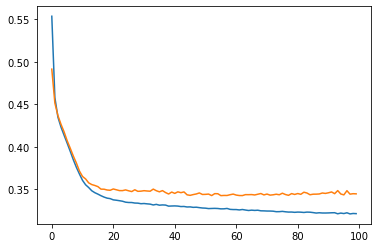

In [94]:
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

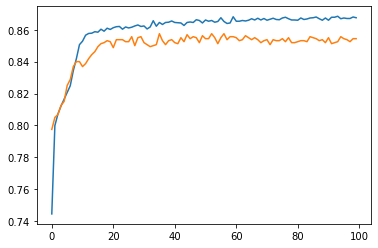

In [95]:
plt.plot(history.history["accuracy"])
plt.plot(history.history["val_accuracy"])